In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [2]:
df = pd.read_csv('diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

<Axes: xlabel='Glucose', ylabel='Count'>

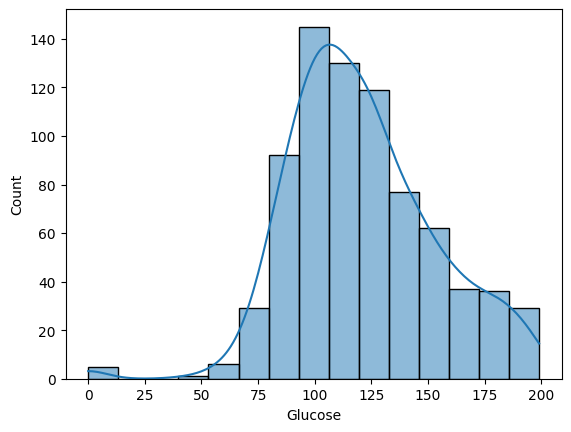

In [6]:
sns.histplot(df['Glucose'] , kde=True , bins=15)

<Axes: xlabel='BloodPressure', ylabel='Count'>

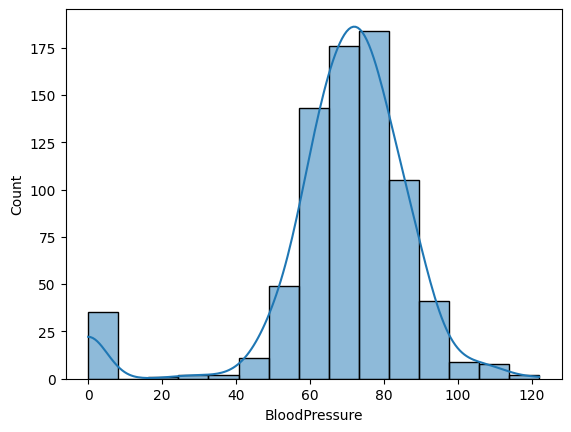

In [7]:
sns.histplot(df['BloodPressure'] , kde=True , bins=15)

<Axes: xlabel='Insulin', ylabel='Count'>

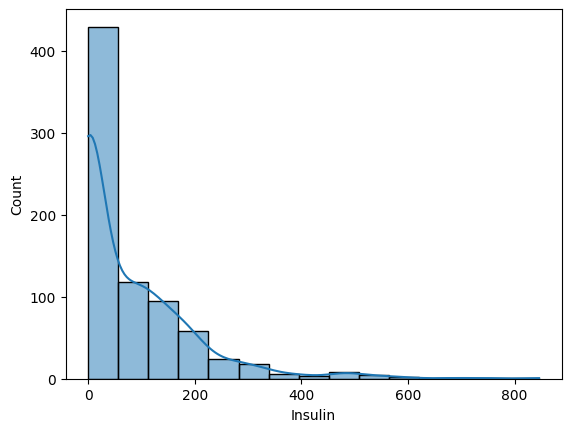

In [8]:
sns.histplot(df['Insulin'] , kde=True , bins=15)

<Axes: xlabel='SkinThickness', ylabel='Count'>

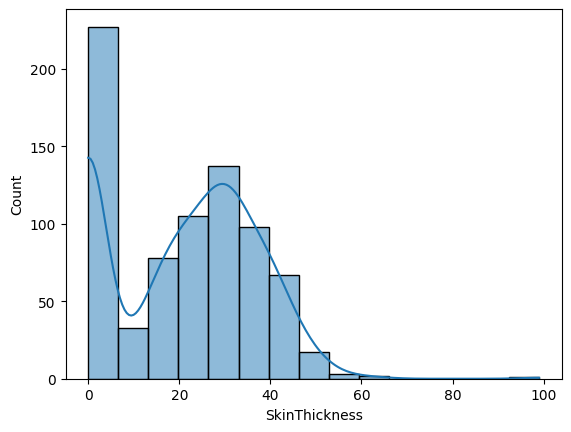

In [9]:
sns.histplot(df['SkinThickness'] , kde=True , bins=15)

<Axes: xlabel='Age', ylabel='Count'>

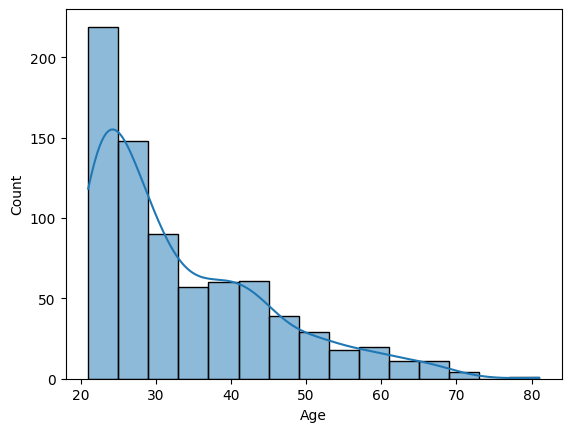

In [10]:
sns.histplot(df['Age'] , kde=True , bins=15)

In [11]:
df2 = df.copy()
df2 = df2.drop('Outcome' , axis=1)

In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
standard_scaled = scaler.fit_transform(df2)

In [13]:
from sklearn.preprocessing import Normalizer
scaler2 = Normalizer()
Normalize_scaled = scaler2.fit_transform(df2)

## Applying KNN

In [14]:
x = df.drop('Outcome' , axis=1)
y = df['Outcome']

In [15]:
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size=0.2 , random_state=3623)

In [16]:
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=9)

In [17]:
train_pred = knn.predict(x_train)
test_pred = knn.predict(x_test)

In [18]:
pred_df= pd.DataFrame({'Actual Value':y_test,'Predicted Value':test_pred})
pred_df

,Actual Value,Predicted Value
10,0,0
587,0,0
762,0,0
95,0,0
627,0,0
...,...,...
412,0,0
585,0,0
760,0,0
31,1,1


In [19]:
conf_matrix = confusion_matrix(y_test, test_pred)
print(conf_matrix)

[[102  15]
 [  6  31]]


Text(58.222222222222214, 0.5, 'Truth')

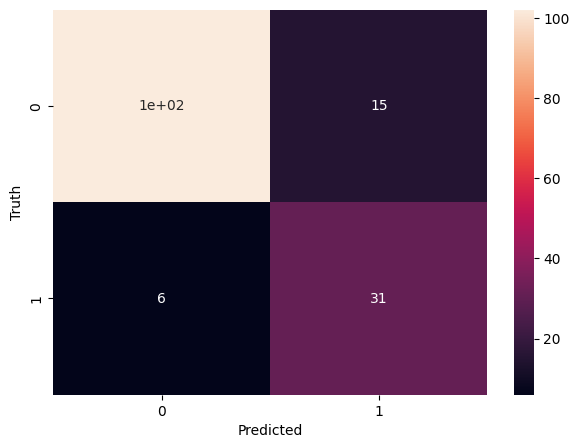

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(7,5))
sn.heatmap(conf_matrix, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [21]:
print(classification_report(y_train, train_pred))

              precision    recall  f1-score   support

           0       0.79      0.84      0.81       383
           1       0.70      0.62      0.66       231

    accuracy                           0.76       614
   macro avg       0.75      0.73      0.74       614
weighted avg       0.76      0.76      0.76       614



In [22]:
accuracy = accuracy_score(y_test, test_pred)
accuracy

0.8636363636363636

## Applying KNN on Standardized data

In [23]:
x = standard_scaled
y = df['Outcome']

In [24]:
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size=0.2 , random_state=3623)

In [25]:
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=9)

In [26]:
train_pred = knn.predict(x_train)
test_pred = knn.predict(x_test)

In [27]:
conf_matrix = confusion_matrix(y_test, test_pred)
print(conf_matrix)

[[100  17]
 [ 10  27]]


In [28]:
print(classification_report(y_train, train_pred))

              precision    recall  f1-score   support

           0       0.80      0.86      0.83       383
           1       0.73      0.64      0.68       231

    accuracy                           0.78       614
   macro avg       0.77      0.75      0.76       614
weighted avg       0.77      0.78      0.77       614



In [29]:
accuracy = accuracy_score(y_test, test_pred)
accuracy

0.8246753246753247

## Applying KNN on Normalized data

In [30]:
x = Normalize_scaled
y = df['Outcome']

In [31]:
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size=0.2 , random_state=3623)

In [32]:
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=9)

In [33]:
train_pred = knn.predict(x_train)
test_pred = knn.predict(x_test)

In [34]:
conf_matrix = confusion_matrix(y_test, test_pred)
print(conf_matrix)

[[95 22]
 [15 22]]


In [35]:
print(classification_report(y_train, train_pred))

              precision    recall  f1-score   support

           0       0.77      0.88      0.82       383
           1       0.74      0.55      0.63       231

    accuracy                           0.76       614
   macro avg       0.75      0.72      0.73       614
weighted avg       0.75      0.76      0.75       614



In [36]:
accuracy = accuracy_score(y_test, test_pred)
accuracy

0.7597402597402597